In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('credit_card_transactions.csv')

In [3]:
dataset['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [24]:
dataset['merchant'].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [4]:
creditcard_dataset = dataset.copy()

In [5]:
creditcard_dataset.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [6]:
creditcard_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [7]:
creditcard_dataset = creditcard_dataset[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'city', 'state', 'zip',
       'city_pop', 'trans_num', 'unix_time',
       'is_fraud', 'merch_zipcode']]

In [8]:
creditcard_dataset.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,city,state,zip,city_pop,trans_num,unix_time,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,NC,28654,3495,0b242abb623afc578575680df30655b9,1325376018,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,WA,99160,149,1f76529f8574734946361c461b024d99,1325376044,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,ID,83252,4154,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,MT,59632,1939,6b849c168bdad6f867558c3793159a81,1325376076,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,VA,24433,99,a41d7549acf90789359a9aa5346dcb46,1325376186,0,22844.0


In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
# Encode categorical variables
label_encoders = {}
for col in ['merchant', 'category']:
    le = LabelEncoder()
    creditcard_dataset[col] = le.fit_transform(creditcard_dataset[col])
    label_encoders[col] = le

In [11]:
features = ['amt', 'city_pop', 'merchant', 'category', 'unix_time']

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(creditcard_dataset[features])

In [13]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)
creditcard_dataset['anomaly'] = iso_forest.fit_predict(X)

In [14]:
creditcard_dataset['anomaly'] = creditcard_dataset['anomaly'].map({1: 0, -1: 1})

In [15]:
creditcard_dataset[['is_fraud', 'anomaly']]

,is_fraud,anomaly
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1296670,0,0
1296671,0,0
1296672,0,0
1296673,0,0


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(creditcard_dataset['is_fraud'], creditcard_dataset['anomaly'])

# Classification report
class_report = classification_report(creditcard_dataset['is_fraud'], creditcard_dataset['anomaly'])

# Output results
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1277177   11992]
 [   6531     975]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1289169
           1       0.08      0.13      0.10      7506

    accuracy                           0.99   1296675
   macro avg       0.54      0.56      0.54   1296675
weighted avg       0.99      0.99      0.99   1296675



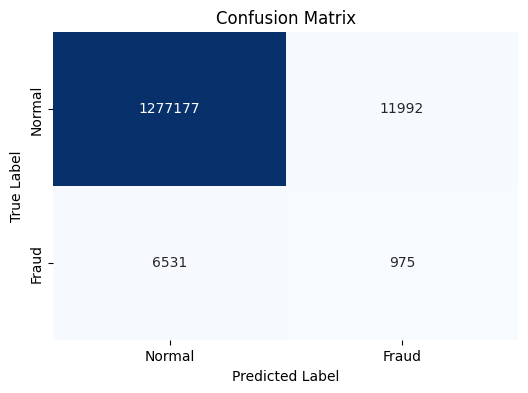

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
new_transaction = {
    'amt': 5000,
    'city_pop': 50,
    'merchant': 'fraud_Kutch, Hermiston and Farrell',
    'category': 'food_dining',
    'unix_time': 1325376416
}

# fraud_Herzog Ltd	misc_pos	4.27

merchant_encoded = label_encoders['merchant'].transform([new_transaction['merchant']])[0]
category_encoded = label_encoders['category'].transform([new_transaction['category']])[0]


In [21]:
transaction_features = np.array([[
    new_transaction['amt'],
    new_transaction['city_pop'],
    merchant_encoded,
    category_encoded,
    new_transaction['unix_time']
]])

transaction_features_scaled = scaler.transform(transaction_features)
anomaly_prediction = iso_forest.predict(transaction_features_scaled)

is_fraud = 1 if anomaly_prediction[0] == -1 else 0
print(f"Is the transaction fraudulent? {'Yes' if is_fraud else 'No'}")

Is the transaction fraudulent? Yes


e:\Credic Card Fraud Detection\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import pickle as pkl

pkl.dump(iso_forest,open('iso_forest.pkl','wb'))

In [23]:
pkl.dump(label_encoders, open('label_encoders.pkl', 'wb'))
pkl.dump(scaler, open('scaler.pkl', 'wb'))